# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Richo Albert Tio]
- **Email:** [study160702@gmail.com]
- **ID Dicoding:** [richo123]

## Menentukan Pertanyaan Bisnis

- Pengaruh Waktu terhadap Jumlah Penyewaan Sepeda
- Perbandingan Pola Penyewaan Sepeda (Hari Kerja vs Akhir Pekan)

## Import Semua Packages/Library yang Digunakan

In [1]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# Load Dataset
file_path_day = 'data/day.csv'  # Ganti dengan path sebenarnya ke file CSV Anda
file_path_hour = 'data/hour.csv'  # Ganti dengan path sebenarnya ke file CSV Anda
data_day = pd.read_csv(file_path_day)
data_hour = pd.read_csv(file_path_hour)

In [3]:
# Konversi kolom tanggal ke format datetime
data_hour['dteday'] = pd.to_datetime(data_hour['dteday'])
data_day['dteday'] = pd.to_datetime(data_day['dteday'])

In [4]:
## Gathering Data
print("Dataset day:")
print(data_day.head())

Dataset day:
   instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1        0        6           0   
1        2 2011-01-02       1   0     1        0        0           0   
2        3 2011-01-03       1   0     1        0        1           1   
3        4 2011-01-04       1   0     1        0        2           1   
4        5 2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [5]:
print("Dataset hour:")
print(data_hour.head())

Dataset hour:
   instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1   0        0        6           0   
1        2 2011-01-01       1   0     1   1        0        6           0   
2        3 2011-01-01       1   0     1   2        0        6           0   
3        4 2011-01-01       1   0     1   3        0        6           0   
4        5 2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


**Insight:**
- pengecekan data
- data yang ditampilkan merupakan hasil konversi

### Assessing Data

In [6]:
data_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [7]:
data_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [8]:
## Assessing Data
print("Data types (day):")
print(data_day.dtypes)

Data types (day):
instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


In [9]:
print("Data types (hour):")
print(data_hour.dtypes)

Data types (hour):
instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


### Cleaning Data

**Insight:**
-  cek data hilang
-  untuk set data yang hilang agar sesuai

In [10]:
# Cek nilai yang hilang
print("\nCek nilai yang hilang pada data_hour:\n", data_hour.isnull().sum())
print("\nCek nilai yang hilang pada data_day:\n", data_day.isnull().sum())


Cek nilai yang hilang pada data_hour:
 instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Cek nilai yang hilang pada data_day:
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [11]:
print("Jumlah duplikasi data day: ", data_day.duplicated().sum())
print("Jumlah duplikasi data hour: ", data_hour.duplicated().sum())

Jumlah duplikasi data day:  0
Jumlah duplikasi data hour:  0


In [12]:
# Ganti nilai yang hilang (jika ada)
data_hour.fillna(0, inplace=True)
data_day.fillna(0, inplace=True)

In [13]:
# Pastikan tipe data sesuai
print("\nTipe data setelah konversi data hour:\n", data_hour.dtypes)
print("\nTipe data setelah konversi data day:\n", data_day.dtypes)


Tipe data setelah konversi data hour:
 instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

Tipe data setelah konversi data day:
 instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
register

In [14]:
data_hour.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [15]:
data_day.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### Explore ...

In [16]:
data_hour.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
5318,5319,2011-08-14,3,0,8,12,0,0,0,2,0.70,0.6667,0.79,0.2239,98,183,281
8340,8341,2011-12-19,4,0,12,4,0,1,1,1,0.16,0.1818,0.86,0.1343,0,4,4
9363,9364,2012-01-31,1,1,1,1,0,2,1,1,0.30,0.2727,0.42,0.2985,1,7,8
13223,13224,2012-07-10,3,1,7,4,0,2,1,1,0.68,0.6364,0.79,0.1343,0,4,4
16063,16064,2012-11-07,4,1,11,0,0,3,1,2,0.30,0.2879,0.56,0.2836,49,234,283


In [17]:
data_day.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
606,607,2012-08-29,3,1,8,0,3,1,1,0.685000,0.635733,0.552083,0.112562,1177,6520,7697
510,511,2012-05-25,2,1,5,0,5,1,1,0.680000,0.627529,0.747083,0.140550,1417,5317,6734
66,67,2011-03-08,1,0,3,0,2,1,1,0.292500,0.302400,0.420833,0.120650,316,1817,2133
352,353,2011-12-19,4,0,12,0,1,1,1,0.276667,0.280933,0.637500,0.172896,260,3143,3403
481,482,2012-04-26,2,1,4,0,4,1,2,0.498333,0.483583,0.756667,0.176625,475,4551,5026


In [18]:
data_hour.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [19]:
data_day.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [20]:
data_hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [21]:
data_day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [22]:
# penyewaan berdasarkan jam
data_hour.groupby(by="hr").agg({
    "cnt": ["sum"]
})

,cnt
,sum
hr,
0,39130
1,24164
2,16352
3,8174
4,4428
5,14261
6,55132
7,154171


In [23]:
# penyewaan berdasarkan hari
data_hour.groupby(by="workingday").agg({
    "cnt": ["sum"]
})

,cnt
,sum
workingday,
0,1000269
1,2292410


**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1:

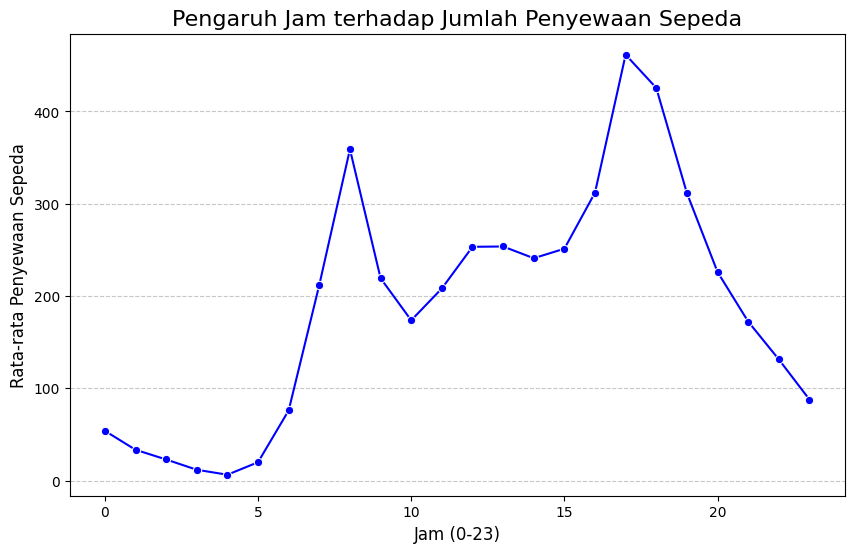

In [24]:
## Visualization 1: Pengaruh Waktu terhadap Jumlah Penyewaan Sepeda
# Rata-rata jumlah penyewaan sepeda per jam
avg_rentals_by_hour = data_hour.groupby('hr')['cnt'].mean().reset_index()

# Visualisasi menggunakan Line Plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='hr', y='cnt', data=avg_rentals_by_hour, marker='o', color='blue')
plt.title('Pengaruh Jam terhadap Jumlah Penyewaan Sepeda', fontsize=16)
plt.xlabel('Jam (0-23)', fontsize=12)
plt.ylabel('Rata-rata Penyewaan Sepeda', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Pertanyaan 2:

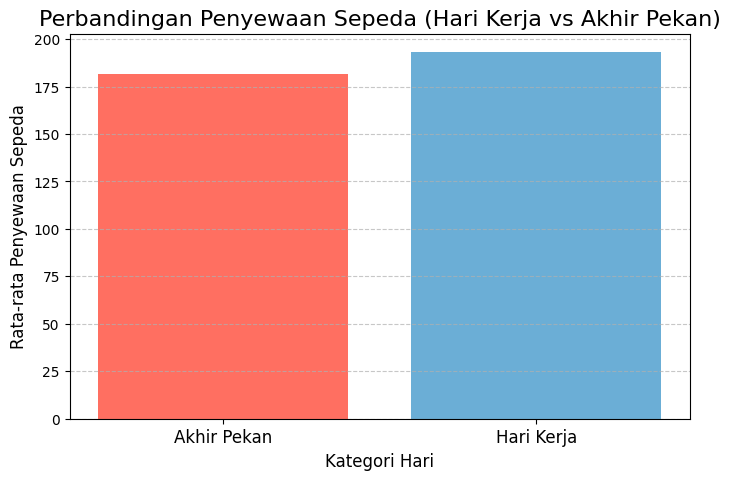

In [25]:
## Visualization 2: Perbandingan Pola Penyewaan Sepeda (Hari Kerja vs Akhir Pekan)
# Rata-rata jumlah penyewaan berdasarkan kategori hari kerja
avg_rentals_workingday = data_hour.groupby('workingday')['cnt'].mean()

# Visualisasi menggunakan Bar Chart
colors = ['#FF6F61', '#6BAED6']  # Warna akhir pekan dan hari kerja
plt.figure(figsize=(8, 5))
plt.bar(avg_rentals_workingday.index, avg_rentals_workingday.values, color=colors)
plt.xticks(ticks=[0, 1], labels=['Akhir Pekan', 'Hari Kerja'], fontsize=12)
plt.title('Perbandingan Penyewaan Sepeda (Hari Kerja vs Akhir Pekan)', fontsize=16)
plt.xlabel('Kategori Hari', fontsize=12)
plt.ylabel('Rata-rata Penyewaan Sepeda', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Insight:**
- pertanyaan 1 : pada jam 8 pagi dan 5 sore jumlah yang paling besar dalam penyewaan sepeda untuk dari jamnnya, dimana bisa disebabkan oleh aktivitas berangkat dan pulang kerja
- pertanyaan 2 : perbandingan dalam diagram balok (bar chart) antara hari kerja dan akhir pekan banyak jumlah di hari kerja dimana perbandingan perhari, antara hari kerja dan akhir

## Conclusion

#### Pertanyaan 1 (Pengaruh Jam terhadap Jumlah Penyewaan Sepeda):
- **Insight:** Penyewaan sepeda mencapai puncaknya pada jam sibuk, yaitu pukul 8 pagi dan pukul 5 sore, yang kemungkinan besar disebabkan oleh aktivitas berangkat dan pulang kerja.
- **Rekomendasi:** Tambahkan lebih banyak sepeda pada jam-jam sibuk untuk memenuhi permintaan tinggi.

#### Pertanyaan 2 (Perbandingan Penyewaan Sepeda pada Hari Kerja vs Akhir Pekan):
- **Insight:** Jumlah penyewaan sepeda lebih tinggi pada hari kerja dibandingkan akhir pekan, menunjukkan bahwa sepeda digunakan lebih banyak untuk keperluan komuter daripada rekreasi.
- **Rekomendasi:** Fokus pada layanan pelanggan selama hari kerja, misalnya dengan memperluas area layanan di sekitar perkantoran.

## Analisis Lanjutan (Opsional)

**Insight:**
- xxx
- xxx